# 結果の可視化

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn  as sns

/Users/yamazakitakurou/.pyenv/versions/3.5.2/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
def read_result(path):
    ret = []
    with open(path, "r") as r_f:
        for line in r_f:
            ret.append(float(line.rstrip()))
    return np.array(ret)

In [4]:
def read_q(path):
    ret = []
    with open(path, "r") as r_f:
        for line in r_f:
            fc, fd = line.rstrip().split(",")
            
            fc = float(fc)
            fd = float(fd)
            
            ret.append(fc)
            ret.append(fd)
            
    return np.array(ret)

## 協調確率の可視化

### Q学習

In [5]:
prefix = "./edge_num/random/q/"
file_name = "/prisoners_dilemma_"
files = ["500", "1000", "2000", "3000", "4000", "5000", "6000", "7000", "8000", "9000"]
d = dict([(f, read_result(prefix+file_name+f+"_coop.csv")) for f in files])

d["iteration"] = np.arange(1000)

df = pd.DataFrame(data = d)

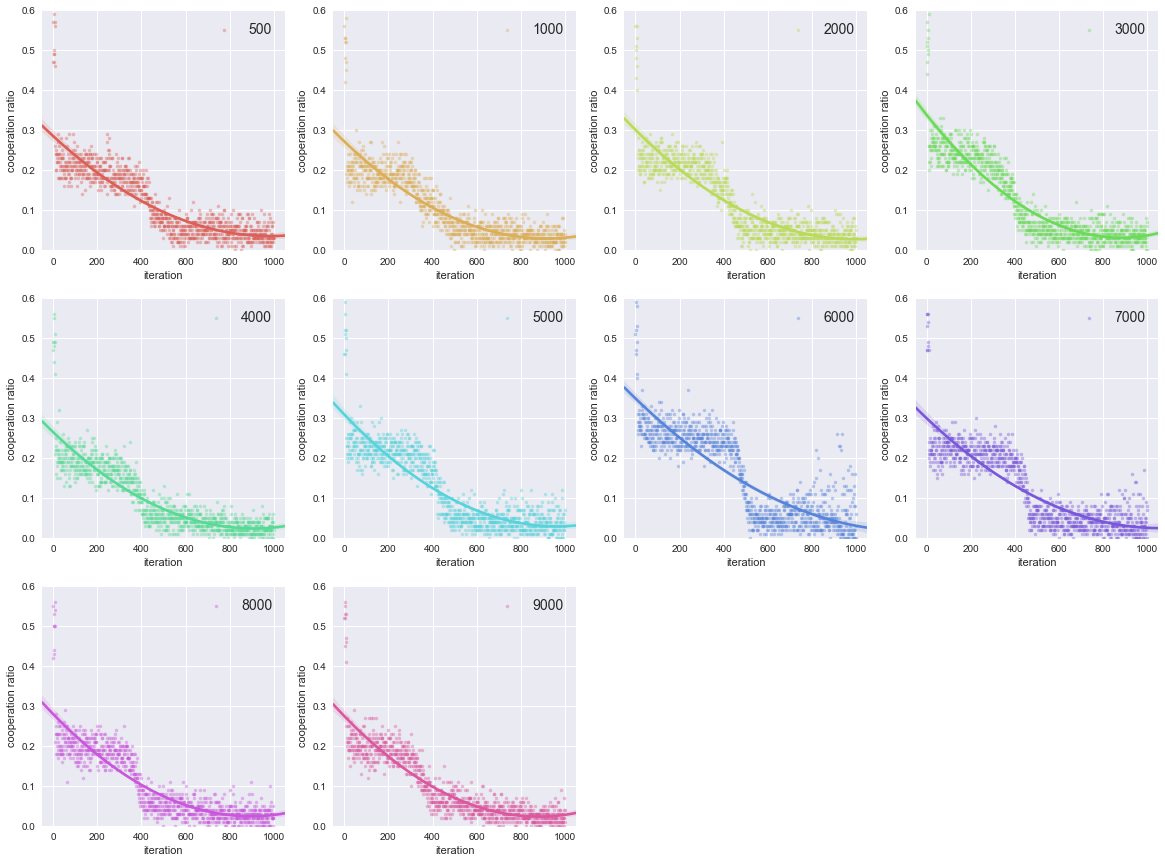

In [7]:
current_palette = sns.color_palette("hls", (len(files)))
plt.figure(figsize=(20, 15))

for i, label in enumerate(files):
    plt.subplot(3, 4, 1+i)
    sns.regplot(x="iteration", y=label, data=df, order=2, scatter_kws={'alpha':0.4}, marker=".", label=label, color=current_palette[i])
    plt.ylim((0,0.6))
    plt.ylabel("cooperation ratio")
    plt.legend(fontsize=14)
    
plt.show()

### WoLF-PHC

In [8]:
prefix = "./edge_num/random/wolf_phc/"
file_name = "/prisoners_dilemma_"
files = ["500", "1000", "2000", "3000", "4000", "5000", "6000", "7000", "8000", "9000"]
d = dict([(f, read_result(prefix+file_name+f+"_coop.csv")) for f in files])

d["iteration"] = np.arange(1000)

df = pd.DataFrame(data = d)

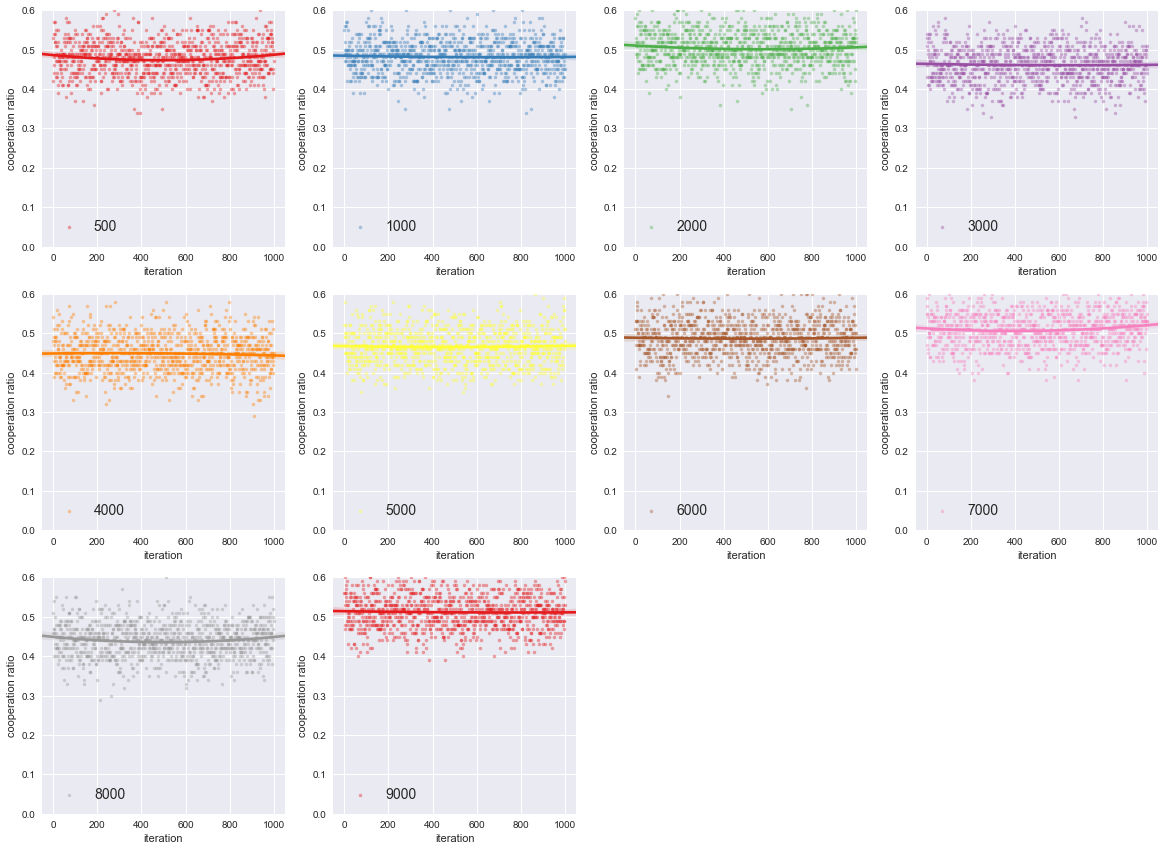

In [9]:
current_palette = sns.color_palette("Set1", (len(files)))
plt.figure(figsize=(20, 20))

for i, label in enumerate(files):
    plt.subplot(4, 4, 1+i)
    sns.regplot(x="iteration", y=label, data=df, order=2, scatter_kws={'alpha':0.4}, marker=".", label=label, color=current_palette[i])
    plt.ylim((0,0.6))
    plt.ylabel("cooperation ratio")
    plt.legend(fontsize=14)
    
plt.show()

## Q値の可視化

### Q学習
-> 平均字数で割るかQ値の更新の方法を変えた方がいい

In [10]:
prefix = "./edge_num/random/q/"
file_name = "/prisoners_dilemma_"
files = ["500", "1000", "2000", "3000", "4000", "5000", "6000", "7000", "8000", "9000"]
d = dict([(f, read_q(prefix+file_name+f+"_q.csv")) for f in files])

iteration = []
for i in range(1000):
    iteration.append(i)
    iteration.append(i)
    
d["iteration"] = np.array(iteration)
d["type"] = np.array(["c", "d"] * 1000)

df = pd.DataFrame(data = d)
df_c = df[df["type"] == "c"]
df_d = df[df["type"] == "d"]

df_c.index = df_c["iteration"]
df_d.index = df_d["iteration"]

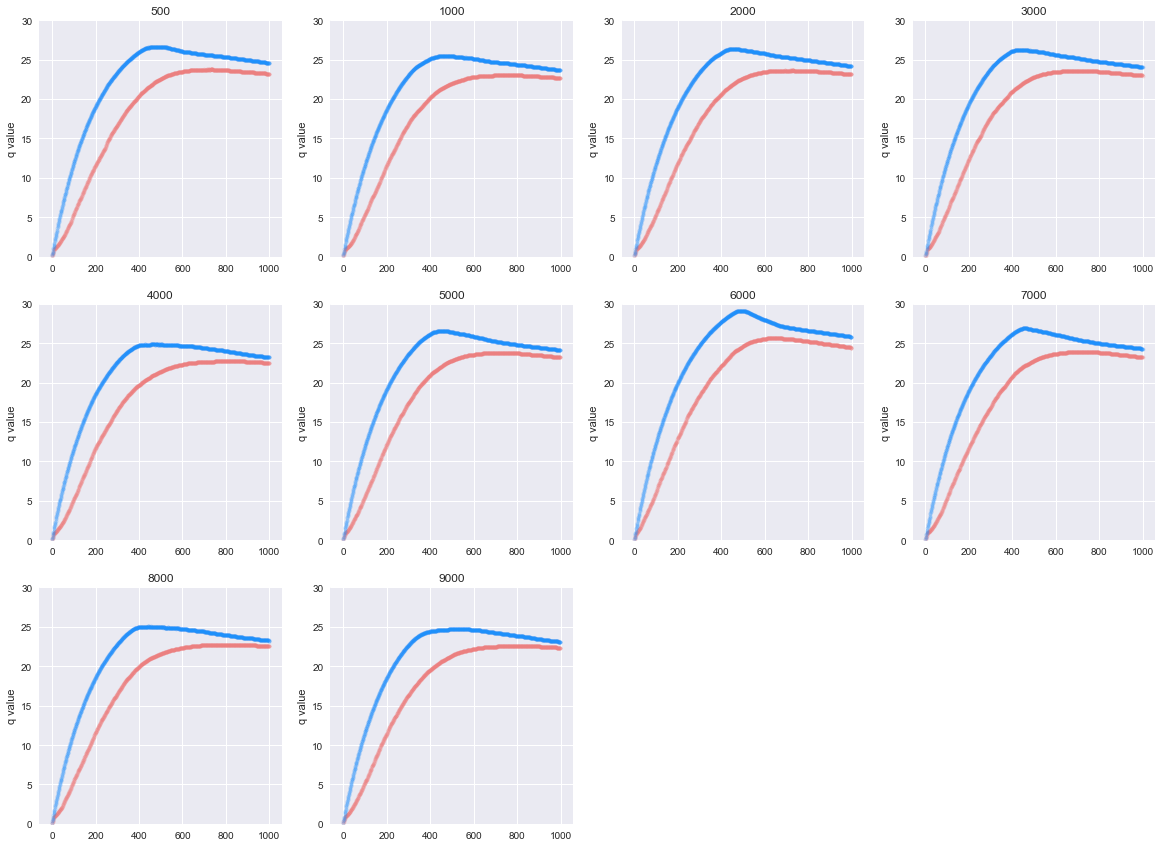

In [11]:
plt.figure(figsize=(20, 20))

for i, label in enumerate(files):
    plt.subplot(4,4,1+i)
    plt.scatter(df_c["iteration"], df_c[label], color="lightcoral", marker=".", alpha=0.2)
    plt.scatter(df_d["iteration"], df_d[label], color="dodgerblue", marker=".", alpha=0.2)
    plt.ylim((0,30))
    plt.ylabel("q value")
    plt.title(label)
    
plt.show()

### WoLF-PHC

In [12]:
prefix = "./edge_num/random/wolf_phc/"
file_name = "/prisoners_dilemma_"
files = ["500", "1000", "2000", "3000", "4000", "5000", "6000", "7000", "8000", "9000"]
d = dict([(f, read_q(prefix+file_name+f+"_q.csv")) for f in files])

iteration = []
for i in range(1000):
    iteration.append(i)
    iteration.append(i)
    
d["iteration"] = np.array(iteration)
d["type"] = np.array(["c", "d"] * 1000)

df = pd.DataFrame(data = d)
df_c = df[df["type"] == "c"]
df_d = df[df["type"] == "d"]

df_c.index = df_c["iteration"]
df_d.index = df_d["iteration"]

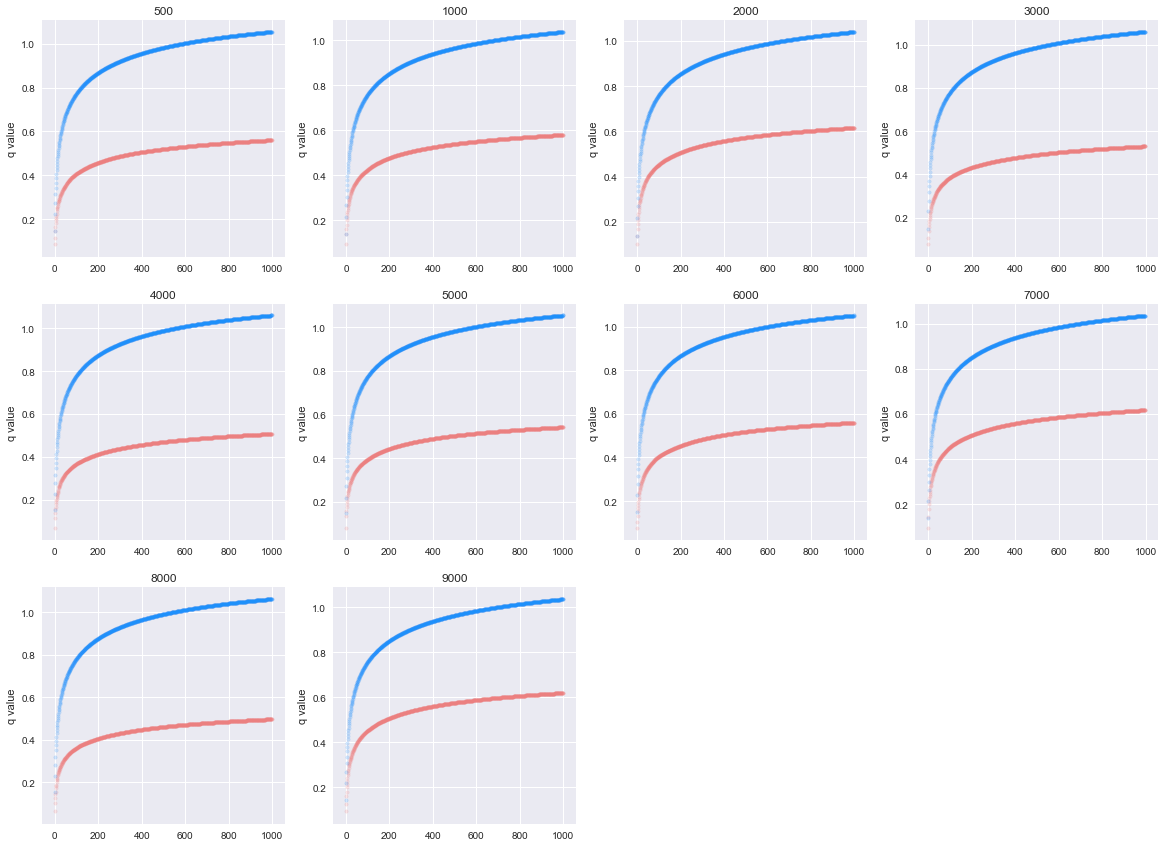

In [13]:
plt.figure(figsize=(20, 20))

for i, label in enumerate(files):
    plt.subplot(4,4,1+i)
    plt.scatter(df_c["iteration"], df_c[label], color="lightcoral", marker=".", alpha=0.2)
    plt.scatter(df_d["iteration"], df_d[label], color="dodgerblue", marker=".", alpha=0.2)
    plt.ylabel("q value")
    plt.title(label)
    
plt.show()